<a href="https://colab.research.google.com/github/siddsh/Information_Retieval/blob/master/Image_Retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' #Run on CPU
import tensorflow.keras.applications.vgg19 as VGG19
model = VGG19.VGG19()

574717952/574710816 [==============================] - 9s 0us/step


In [7]:
#Dataset
!wget http://www.image-net.org/image/tiny/tiny-imagenet-200.zip

--2020-10-01 04:39:15--  http://www.image-net.org/image/tiny/tiny-imagenet-200.zip
Resolving www.image-net.org (www.image-net.org)... 171.64.68.16
Connecting to www.image-net.org (www.image-net.org)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M   698KB/s    in 4m 14s  

2020-10-01 04:43:29 (953 KB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [10]:
#Unzip
!unzip /content/tiny-imagenet-200.zip

Streaming output truncated to the last 5000 lines.
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating: tiny-imagenet-200/val/images/val_1598.JPEG  
  inflating: tiny-ima

In [12]:
#For getting the index file for categories
!wget https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json

--2020-10-01 04:45:22--  https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/json]
Saving to: ‘imagenet_class_index.json.1’

imagenet_class_inde 100%[===================>]  34.53K  --.-KB/s    in 0s      

2020-10-01 04:45:22 (88.4 MB/s) - ‘imagenet_class_index.json.1’ saved [35363/35363]



In [13]:
#get classes
import json
with open("imagenet_class_index.json") as json_file:
    data = json.load(json_file)
data

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [16]:
#Test Image
!wget https://images-na.ssl-images-amazon.com/images/I/71FH06GfegL._SL1500_.jpg
!mv 71FH06GfegL._SL1500_.jpg sewm.jpg

--2020-10-01 04:47:30--  https://images-na.ssl-images-amazon.com/images/I/71FH06GfegL._SL1500_.jpg
Resolving images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)... 104.122.44.15, 2a04:4e42::272, 2a04:4e42:200::272, ...
Connecting to images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)|104.122.44.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101416 (99K) [image/jpeg]
Saving to: ‘71FH06GfegL._SL1500_.jpg.1’

71FH06GfegL._SL1500 100%[===================>]  99.04K  --.-KB/s    in 0.02s   

2020-10-01 04:47:31 (4.13 MB/s) - ‘71FH06GfegL._SL1500_.jpg.1’ saved [101416/101416]



Given Image: 


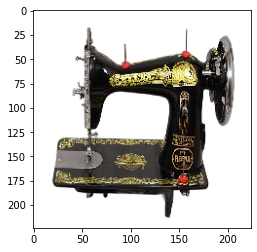

40960/35363 [==================================] - 0s 0us/step
Prediction 1 0.9999989 sewing_machine
Prediction 2 8.825598e-07 iron
Prediction 3 2.0167114e-08 joystick


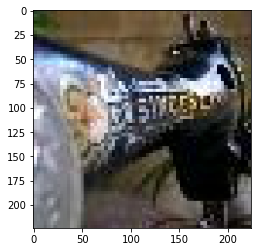

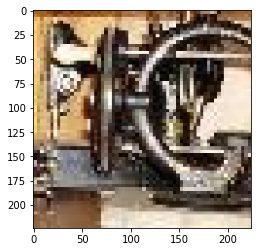

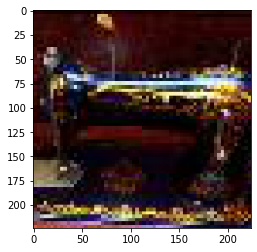

In [18]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
classes=dict()
for i in range(len(data)):
    classes[data[str(i)][0]] = data[str(i)][1]
def search(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img = np.asarray(img)
    print("Given Image: ")
    plt.imshow(img)
    plt.show()
    img = np.expand_dims(img, axis=0)
    top_classes=3
    pred = model.predict(img)
    pred = VGG19.decode_predictions(pred, top=top_classes)
    for i in range(top_classes):
        print("Prediction", i+1, pred[0][i][2], pred[0][i][1])
    path = "tiny-imagenet-200/train/" + pred[0][0][0] + "/images/"
    for i in range(3):
        img = image.load_img(path+os.listdir(path)[i], target_size=(224,224))
        img = np.asarray(img)
        plt.imshow(img)
        plt.show()
search("sewm.jpg")